# 8. Морфологические преобразования - Individual

In [20]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [21]:
# функция ввода изображения
def img_input(img_path, size=(0, 0), type=1):
    img = cv2.imread(img_path, type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img


# функция вывода изображения
def img_print(images, titles, row_and_colm=(0, 0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

## 1. Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы.

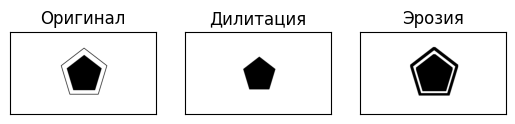

In [22]:
image = img_input('img/ind_1.jpg', type=0)

# Создадим ядро 5x5
kernel = np.ones((8, 8), np.uint8)

# Выполним функции  дилатации и эрозии
dilation = cv2.dilate(image, kernel, iterations=2)
erosion = cv2.erode(image, kernel, iterations=2)

res = [image, dilation, erosion]
title = ['Оригинал', 'Дилитация', 'Эрозия']

img_print(res, title, hard_type='gray')

## 2. Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия и закрытия.

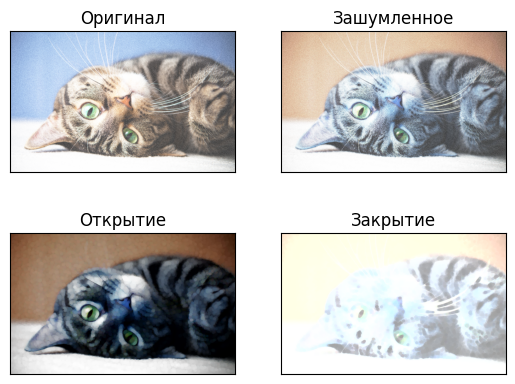

In [23]:
image = Image.open('img/ind_cat.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

image.save("img/median.png", "JPEG")

noise = cv2.imread("img/median.png", 1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))

opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)

res = [image, noise, opening, closing]
title = ['Оригинал', 'Зашумленное', 'Открытие', 'Закрытие']

img_print(res, title, row_and_colm=(2, 2))